<h3><center>CE 597: AI for GEO</center></h3>

<h1><center>Predicting Landslides Using Neural Network and Support Vector Machine With Physical Constrains</center></h1>

<center>By:</center>

<h2><center>Bahman Sheikh <br> Te Pei </center></h2>

<img src="img/landslide.png" style="width: 400px;">

# Predictor variables

<img src="img/combined.jpg">

# Import Python libraries 

In [77]:
from skimage import io
from sklearn.model_selection import train_test_split
import numpy as np
import skimage.transform as st
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
from typing import List
from sklearn.decomposition import PCA
import random
import tqdm
import itertools
import math

# Read and prepare the Data

In [78]:
# Predictors
aspect = io.imread('aspect.tif')
clay_fraction = io.imread('clay_fraction.tif')
elevation = io.imread('elevation.tif')
NDVI = io.imread('NDVI.tif')
rainfall = io.imread('rainfall.tif')
slope = io.imread('slope.tif')
TWI = io.imread('TWI.tif')
sand_fraction = io.imread('sand_fraction.tif')
# Response
label = io.imread('label.tif')

## Check the dimension of the data

In [79]:
print("Shape of the aspect: ", (aspect).shape)
print("Shape of the clay_fraction: ", (clay_fraction).shape)
print("Shape of the elevation: ", (elevation).shape)
print("Shape of the NDVI: ", (NDVI).shape)
print("Shape of the rainfall: ", (rainfall).shape)
print("Shape of the slope: ", (slope).shape)
print("Shape of the TWI: ", (TWI).shape)
print("Shape of the sand_fraction: ", (sand_fraction).shape)
print("Shape of the label: ", (label).shape)

Shape of the aspect:  (4651, 2588)
Shape of the clay_fraction:  (4651, 2587)
Shape of the elevation:  (4651, 2588)
Shape of the NDVI:  (4652, 2587)
Shape of the rainfall:  (4652, 2587)
Shape of the slope:  (4651, 2588)
Shape of the TWI:  (4651, 2588)
Shape of the sand_fraction:  (4651, 2587)
Shape of the label:  (4651, 2588)


### Some rows or columns in the dataset of somw predictors are missing, hence, we used resize to make them uni-size:

In [80]:
aspect = st.resize(aspect, (4651, 2588))
clay_fraction = st.resize(clay_fraction, (4651, 2588))
elevation = st.resize(elevation , (4651, 2588))
NDVI = st.resize(NDVI, (4651, 2588))
rainfall = st.resize(rainfall, (4651, 2588))
slope = st.resize(slope, (4651, 2588))
TWI = st.resize(TWI, (4651, 2588)) 
sand_fraction = st.resize(sand_fraction, (4651, 2588)) 

In [81]:
print("Shape of the aspect: ", (aspect).shape)
print("Shape of the clay_fraction: ", (clay_fraction).shape)
print("Shape of the elevation: ", (elevation).shape)
print("Shape of the NDVI: ", (NDVI).shape)
print("Shape of the rainfall: ", (rainfall).shape)
print("Shape of the slope: ", (slope).shape)
print("Shape of the TWI: ", (TWI).shape)

Shape of the aspect:  (4651, 2588)
Shape of the clay_fraction:  (4651, 2588)
Shape of the elevation:  (4651, 2588)
Shape of the NDVI:  (4651, 2588)
Shape of the rainfall:  (4651, 2588)
Shape of the slope:  (4651, 2588)
Shape of the TWI:  (4651, 2588)


## Make the response variables one dimentional and concatenate to creat X dataset

In [82]:
aspect = aspect.ravel()
clay_fraction = clay_fraction.ravel()
elevation = elevation.ravel()
NDVI = NDVI.ravel()
rainfall = rainfall.ravel()
slope = slope.ravel()
TWI = TWI.ravel()
sand_fraction = sand_fraction.ravel()

In [83]:
print("Size of the aspect: ", len(aspect))
print("Size of the clay_fraction: ", len(clay_fraction))
print("Size of the elevation: ", len(elevation))
print("Size of the NDVI: ", len(NDVI))
print("Size of the rainfall: ", len(rainfall))
print("Size of the slope: ", len(slope))
print("Size of the TWI: ", len(TWI))
print("Size of the sand_fraction: ", len(sand_fraction))

Size of the aspect:  12036788
Size of the clay_fraction:  12036788
Size of the elevation:  12036788
Size of the NDVI:  12036788
Size of the rainfall:  12036788
Size of the slope:  12036788
Size of the TWI:  12036788
Size of the sand_fraction:  12036788


In [84]:
X = np.vstack([aspect, clay_fraction, elevation, NDVI, rainfall, slope, TWI, sand_fraction]).T
y = label.ravel()

In [85]:
print("Data shape:")
print("X: ", X.shape)
print("y: ", y.shape)

Data shape:
X:  (12036788, 8)
y:  (12036788,)


# Standardization

In [86]:
for i in range(0,8):
    X[:,i] = (X[:,i] - np.mean(X[:,i])) / np.std(X[:,i])

## Creat train and test datasets
We considered 20% as test datase and 80% as train dataset

In [87]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

# Model

# Logistic Regression

In [88]:
model = LogisticRegression(solver='liblinear').fit(X_train, y_train)

In [89]:
model.score(X_test, y_test)

0.9998911669971812

In [90]:
confusion_matrix(y_test, model.predict(X_test))

array([[2407096,       0],
       [    262,       0]], dtype=int64)

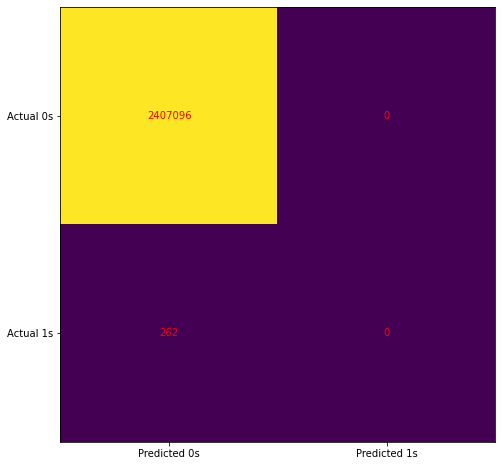

In [91]:
#Cong-Matrix

cm = confusion_matrix(y_test, model.predict(X_test))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

# Imbalance data issue

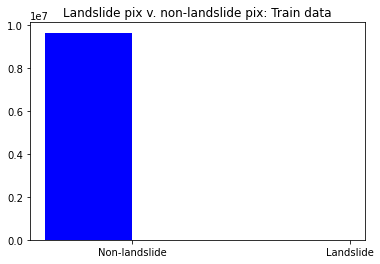

Number of landslide pixels:  994
Number of non-landslide pixels:  9628436


In [92]:
data = {0: len(y_train) - np.sum(y_train), 1: np.sum(y_train)}
bar_width = 0.4
plt.bar([x for x in data], [data[x] for x in data], bar_width, color='blue')
plt.xticks([x + bar_width/2 for x in data], ('Non-landslide', 'Landslide'))  
plt.title("Landslide pix v. non-landslide pix: Train data")
plt.show()
print("Number of landslide pixels: ", np.sum(y_train))
print("Number of non-landslide pixels: ", len(y_train) - np.sum(y_train))

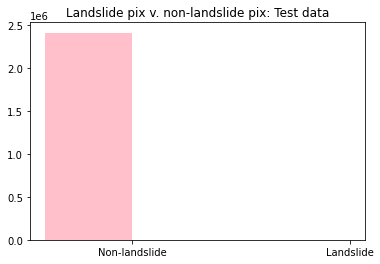

Number of landslide pixels:  262
Number of non-landslide pixels:  2407096


In [93]:
data = {0: len(y_test) - np.sum(y_test), 1: np.sum(y_test)}
bar_width = 0.4
plt.bar([x for x in data], [data[x] for x in data], bar_width, color='pink')
plt.xticks([x + bar_width/2 for x in data], ('Non-landslide', 'Landslide'))  
plt.title("Landslide pix v. non-landslide pix: Test data")
plt.show()
print("Number of landslide pixels: ", np.sum(y_test))
print("Number of non-landslide pixels: ", len(y_test) - np.sum(y_test))

In [94]:
# Function to create dataset with balamce labels (with a given ratio)
def balanced_subsample(x,y,subsample_size=1.0):

    class_xs = []
    min_elems = None

    for yi in np.unique(y):
        elems = x[(y == yi)]
        class_xs.append((yi, elems))
        if min_elems == None or elems.shape[0] < min_elems:
            min_elems = elems.shape[0]

    use_elems = min_elems
    if subsample_size < 1:
        use_elems = int(min_elems*subsample_size)

    xs = []
    ys = []

    for ci,this_xs in class_xs:
        if len(this_xs) > use_elems:
            np.random.shuffle(this_xs)

        x_ = this_xs[:use_elems]
        y_ = np.empty(use_elems)
        y_.fill(ci)

        xs.append(x_)
        ys.append(y_)

    xs = np.concatenate(xs)
    ys = np.concatenate(ys)

    return xs,ys

In [95]:
bX, by = balanced_subsample(X,y)

In [96]:
X_train,X_test,y_train,y_test = train_test_split(bX,by,test_size=0.20,random_state=42)

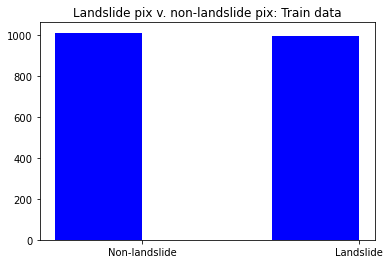

Number of landslide pixels:  996.0
Number of non-landslide pixels:  1013.0


In [97]:
data = {0: len(y_train) - np.sum(y_train), 1: np.sum(y_train)}
bar_width = 0.4
plt.bar([x for x in data], [data[x] for x in data], bar_width, color='blue')
plt.xticks([x + bar_width/2 for x in data], ('Non-landslide', 'Landslide'))  
plt.title("Landslide pix v. non-landslide pix: Train data")
plt.show()
print("Number of landslide pixels: ", np.sum(y_train))
print("Number of non-landslide pixels: ", len(y_train) - np.sum(y_train))

In [98]:
model = LogisticRegression(solver='liblinear').fit(X_train, y_train)
model.score(X_test, y_test) 

0.8926441351888668

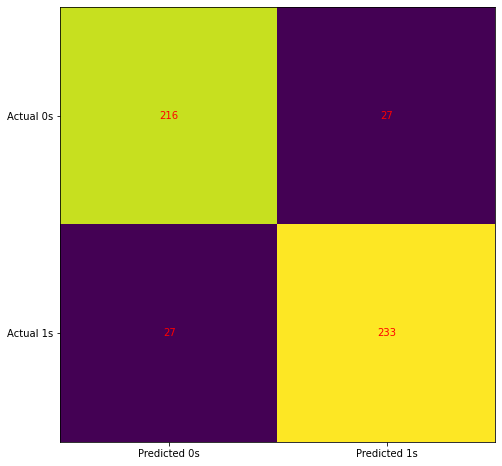

In [99]:
#conf-Matrix
cm = confusion_matrix(y_test, model.predict(X_test))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [100]:
model = LogisticRegression(penalty = 'l1', solver='liblinear').fit(X_train, y_train)
model.score(X_test, y_test)

0.8886679920477137

# Feature importance

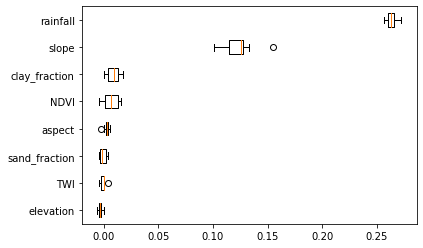

In [101]:
from sklearn.inspection import permutation_importance
result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)
perm_sorted_idx = result.importances_mean.argsort()
columns = np.array(["aspect", "clay_fraction", "elevation", "NDVI", "rainfall", "slope", "TWI", "sand_fraction"])
plt.boxplot(result.importances[perm_sorted_idx].T, vert=False,
        labels=columns[perm_sorted_idx])
plt.show()

In [105]:
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree

clf_depth_model = []
clf_depth_score = []

for i in range(1, 20):
    clf_depth_model.append(DecisionTreeClassifier(max_depth = i, min_samples_split = 10, splitter = "best", random_state=42))
    treeModel = clf_depth_model[i - 1].fit(X_train, y_train)
    clf_depth_score.append(treeModel.score(X_test, y_test))

Text(0, 0.5, 'score')

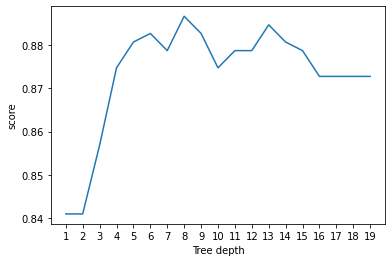

In [106]:
plt.plot(list(range(1, 20)), clf_depth_score )
plt.xticks(list(range(1, 20)))
plt.xlabel("Tree depth")
plt.ylabel("score")

In [110]:
print("Decision tree accuracy score:", clf_depth_score[8]) # max_depth_4

Decision tree accuracy score: 0.882703777335984


In [111]:
text_representation = tree.export_text(clf)
print(text_representation)

AttributeError: 'SVC' object has no attribute 'tree_'

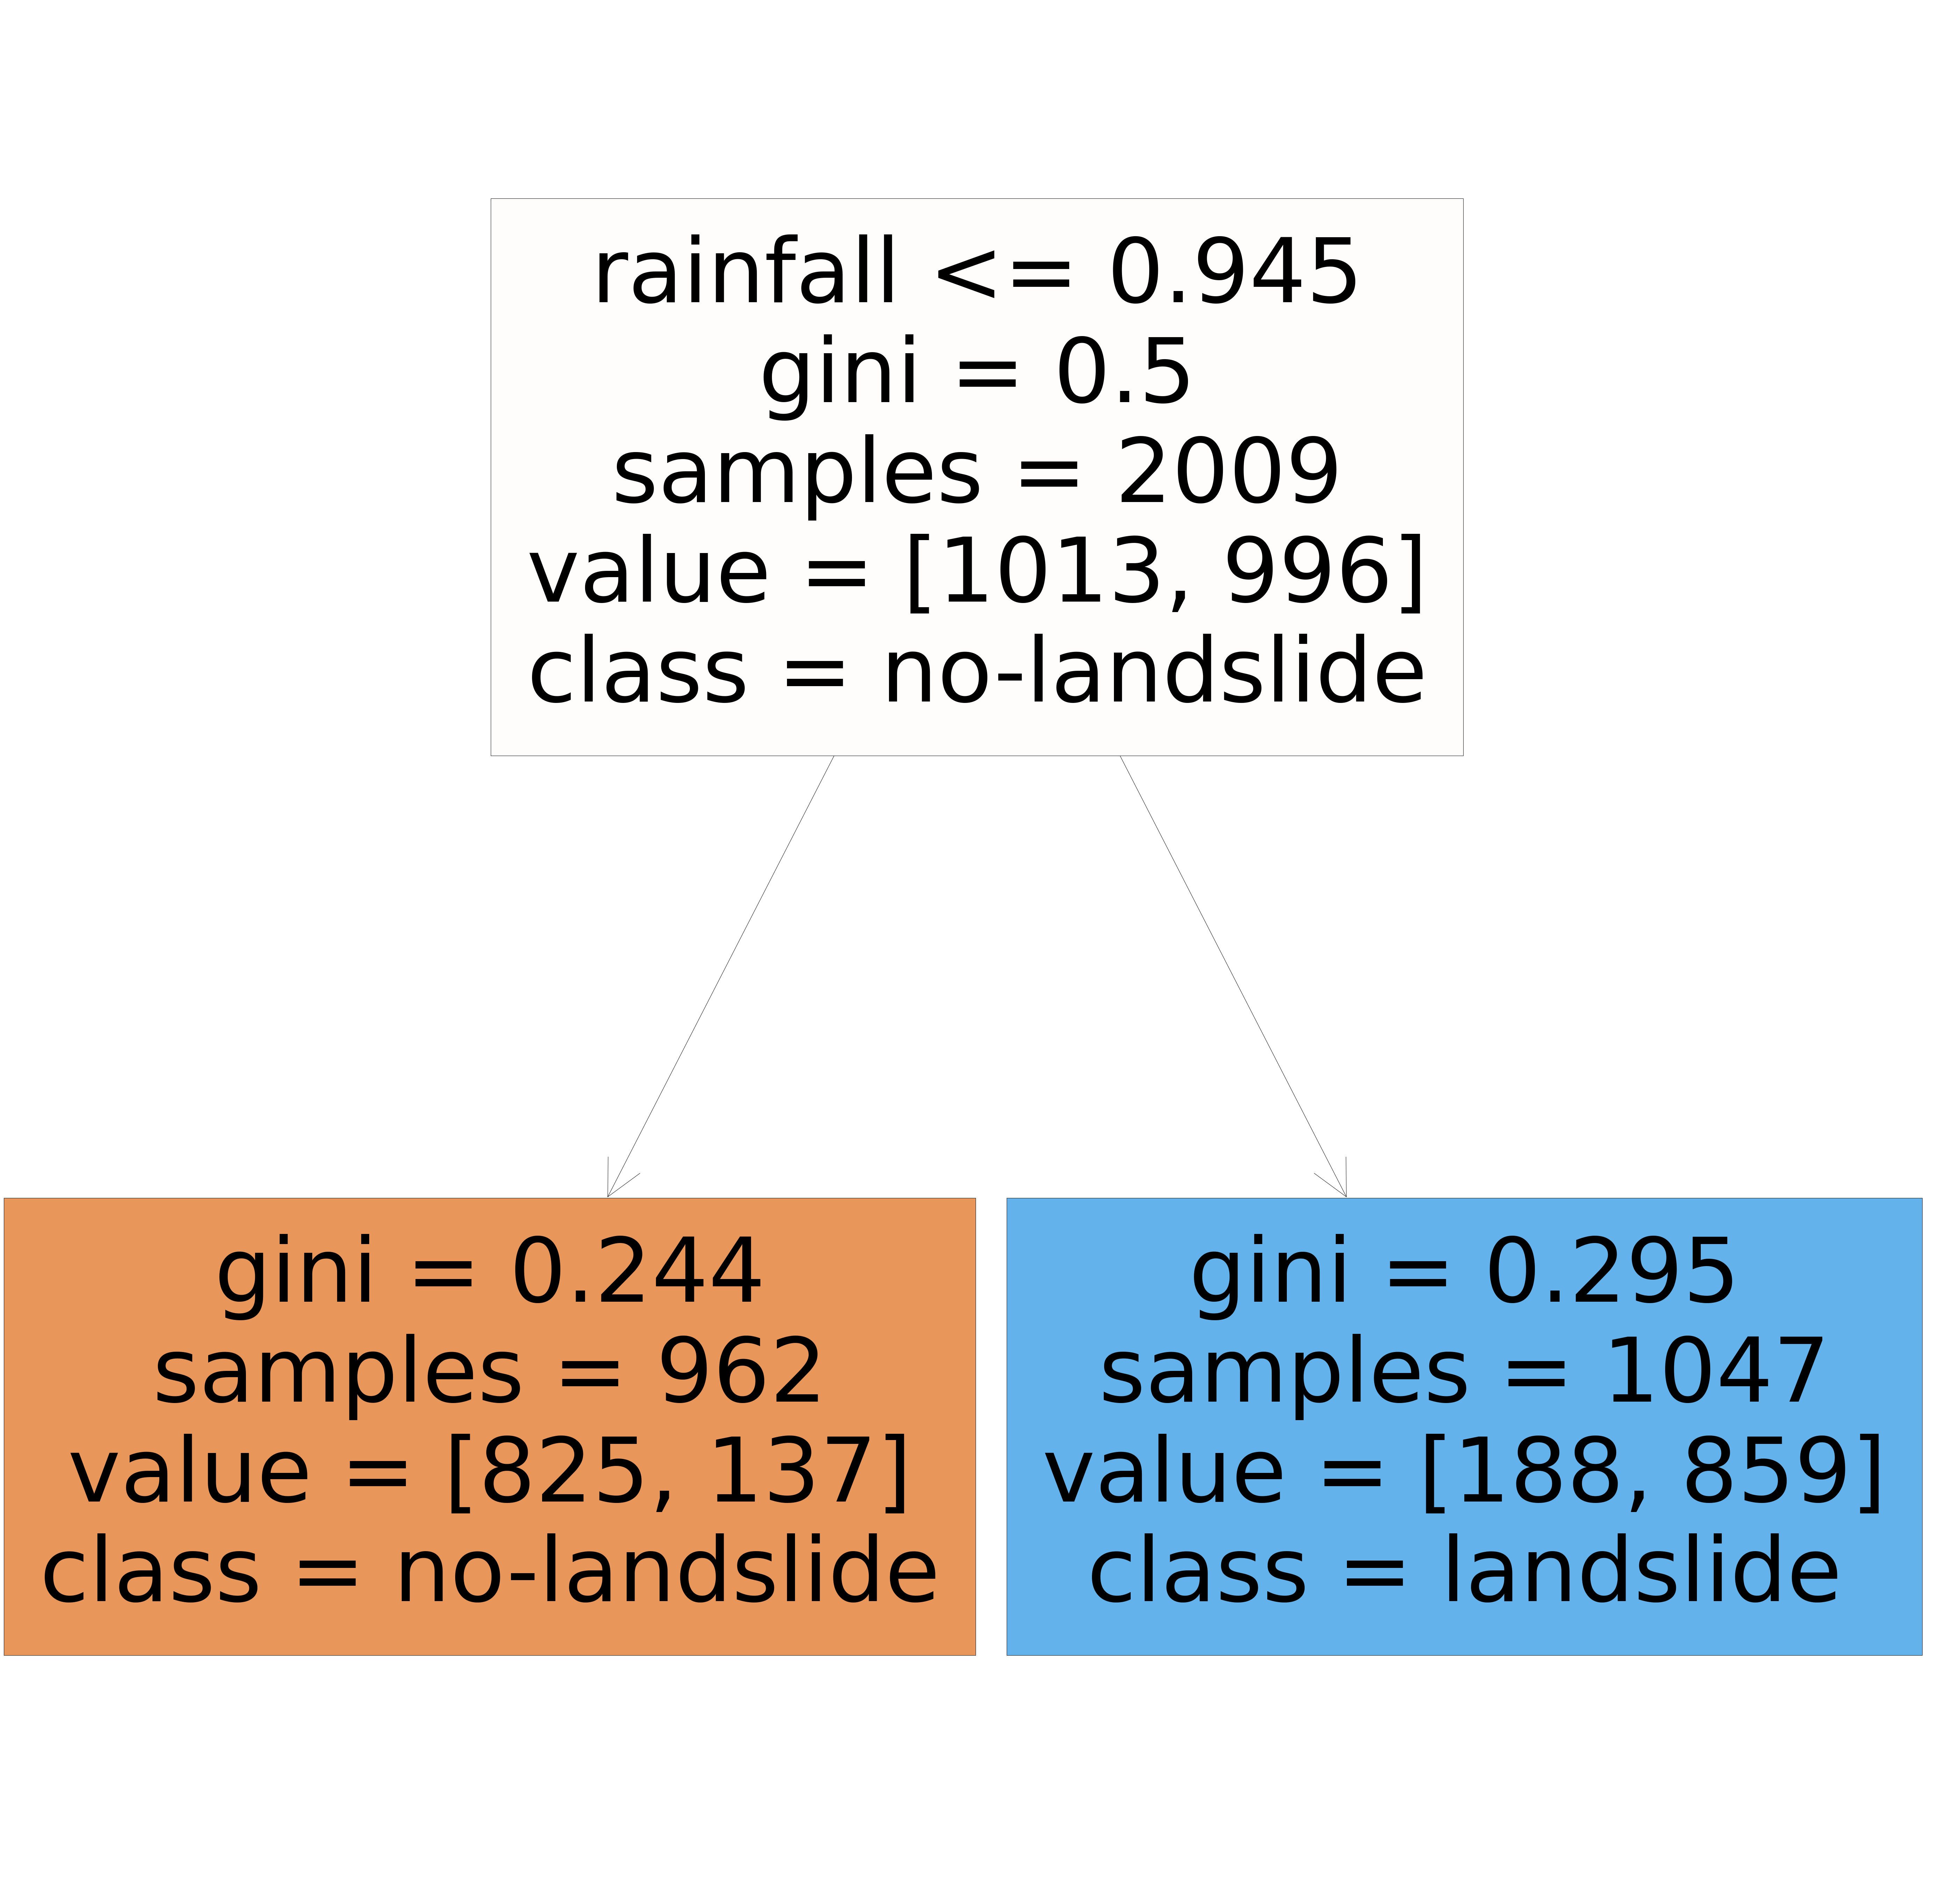

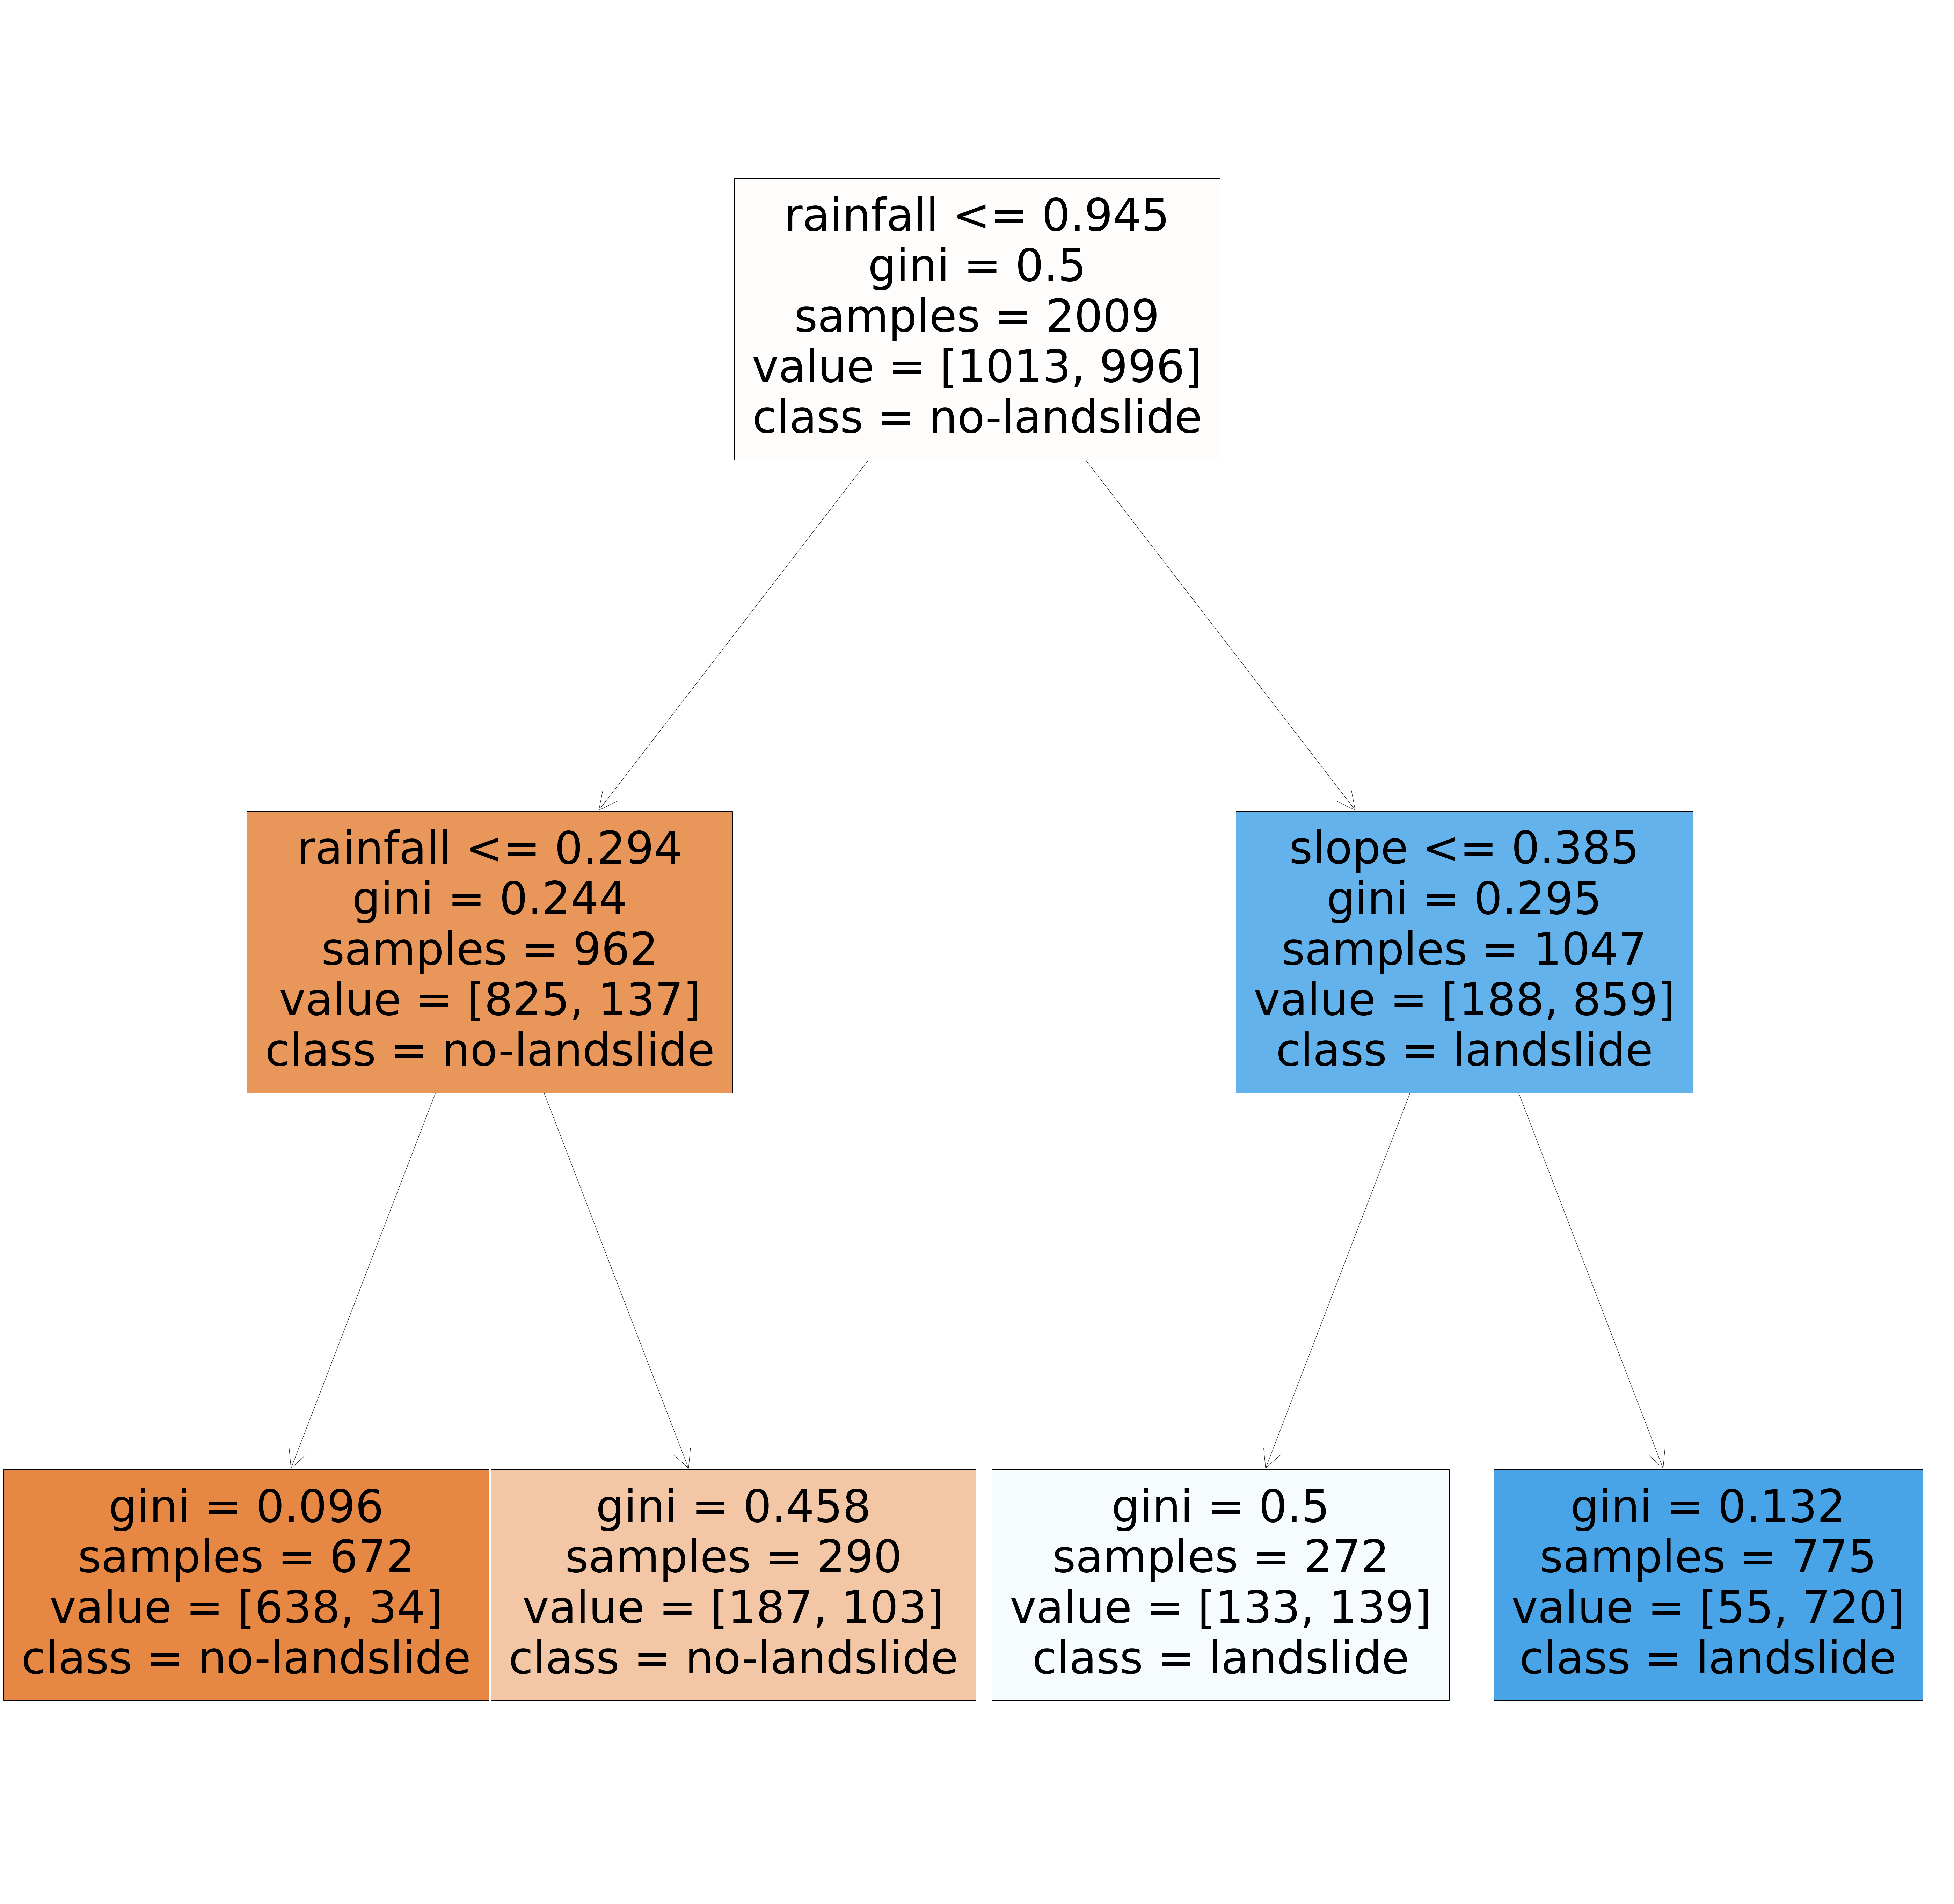

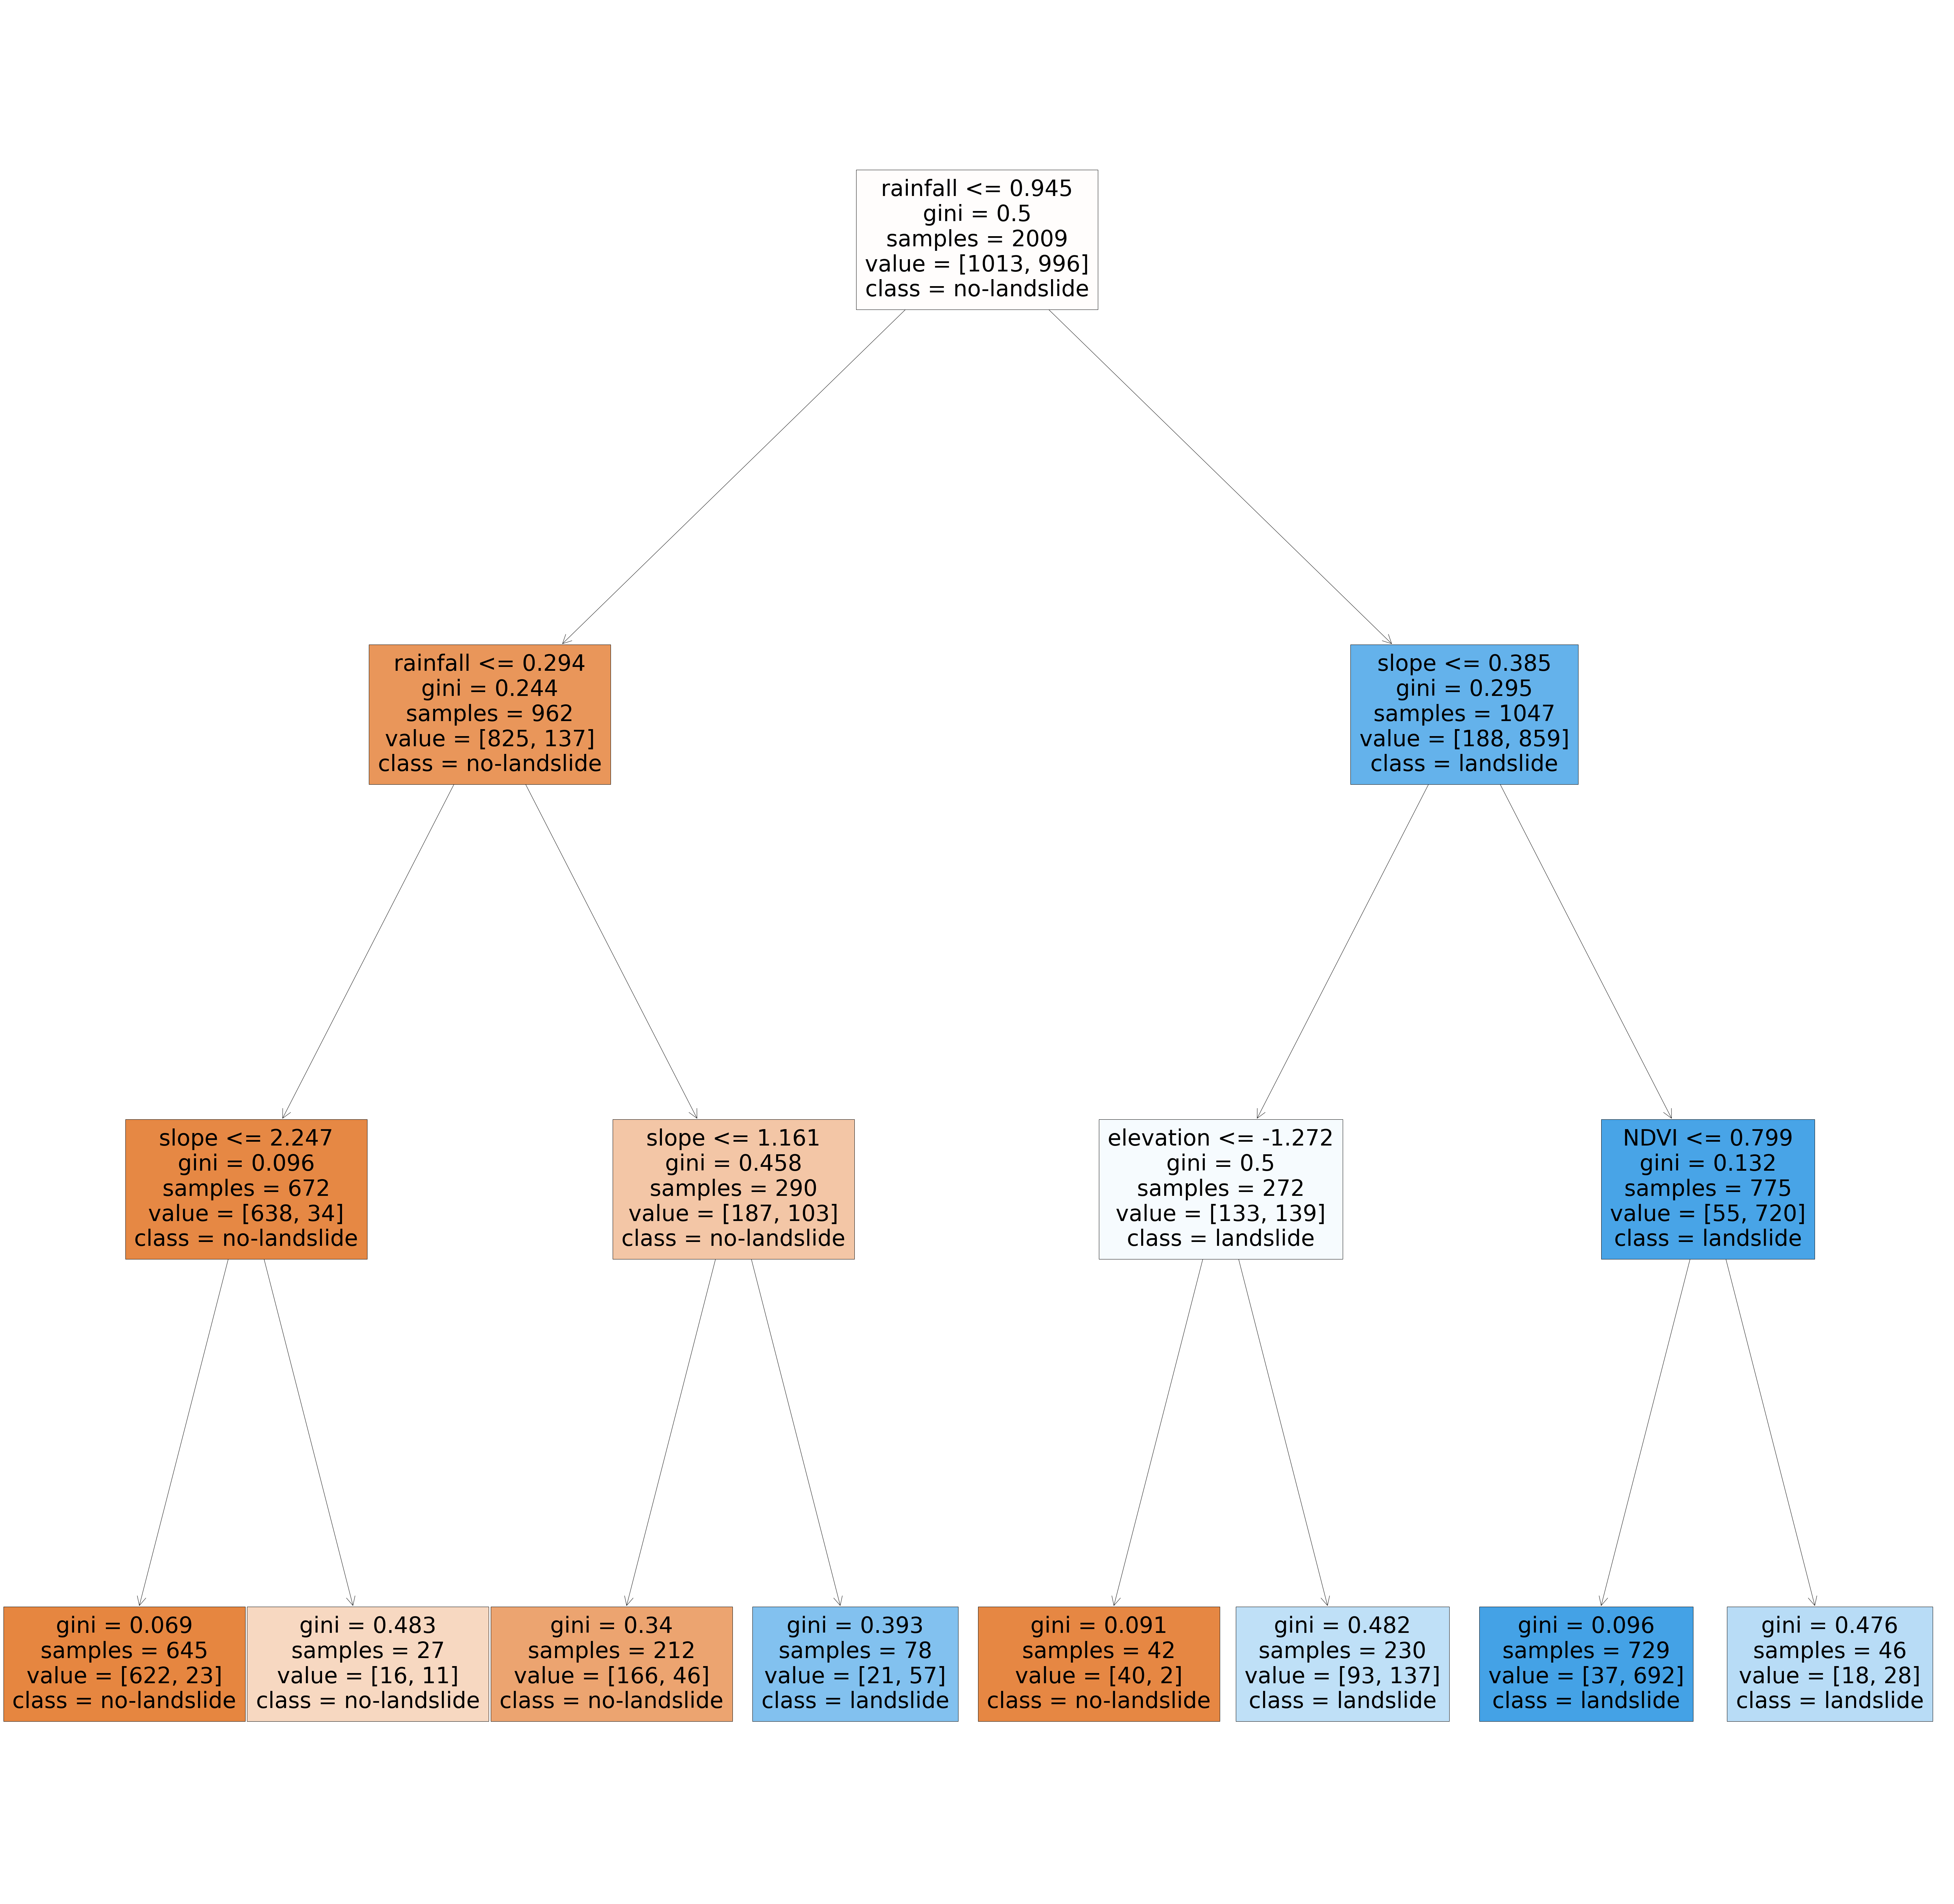

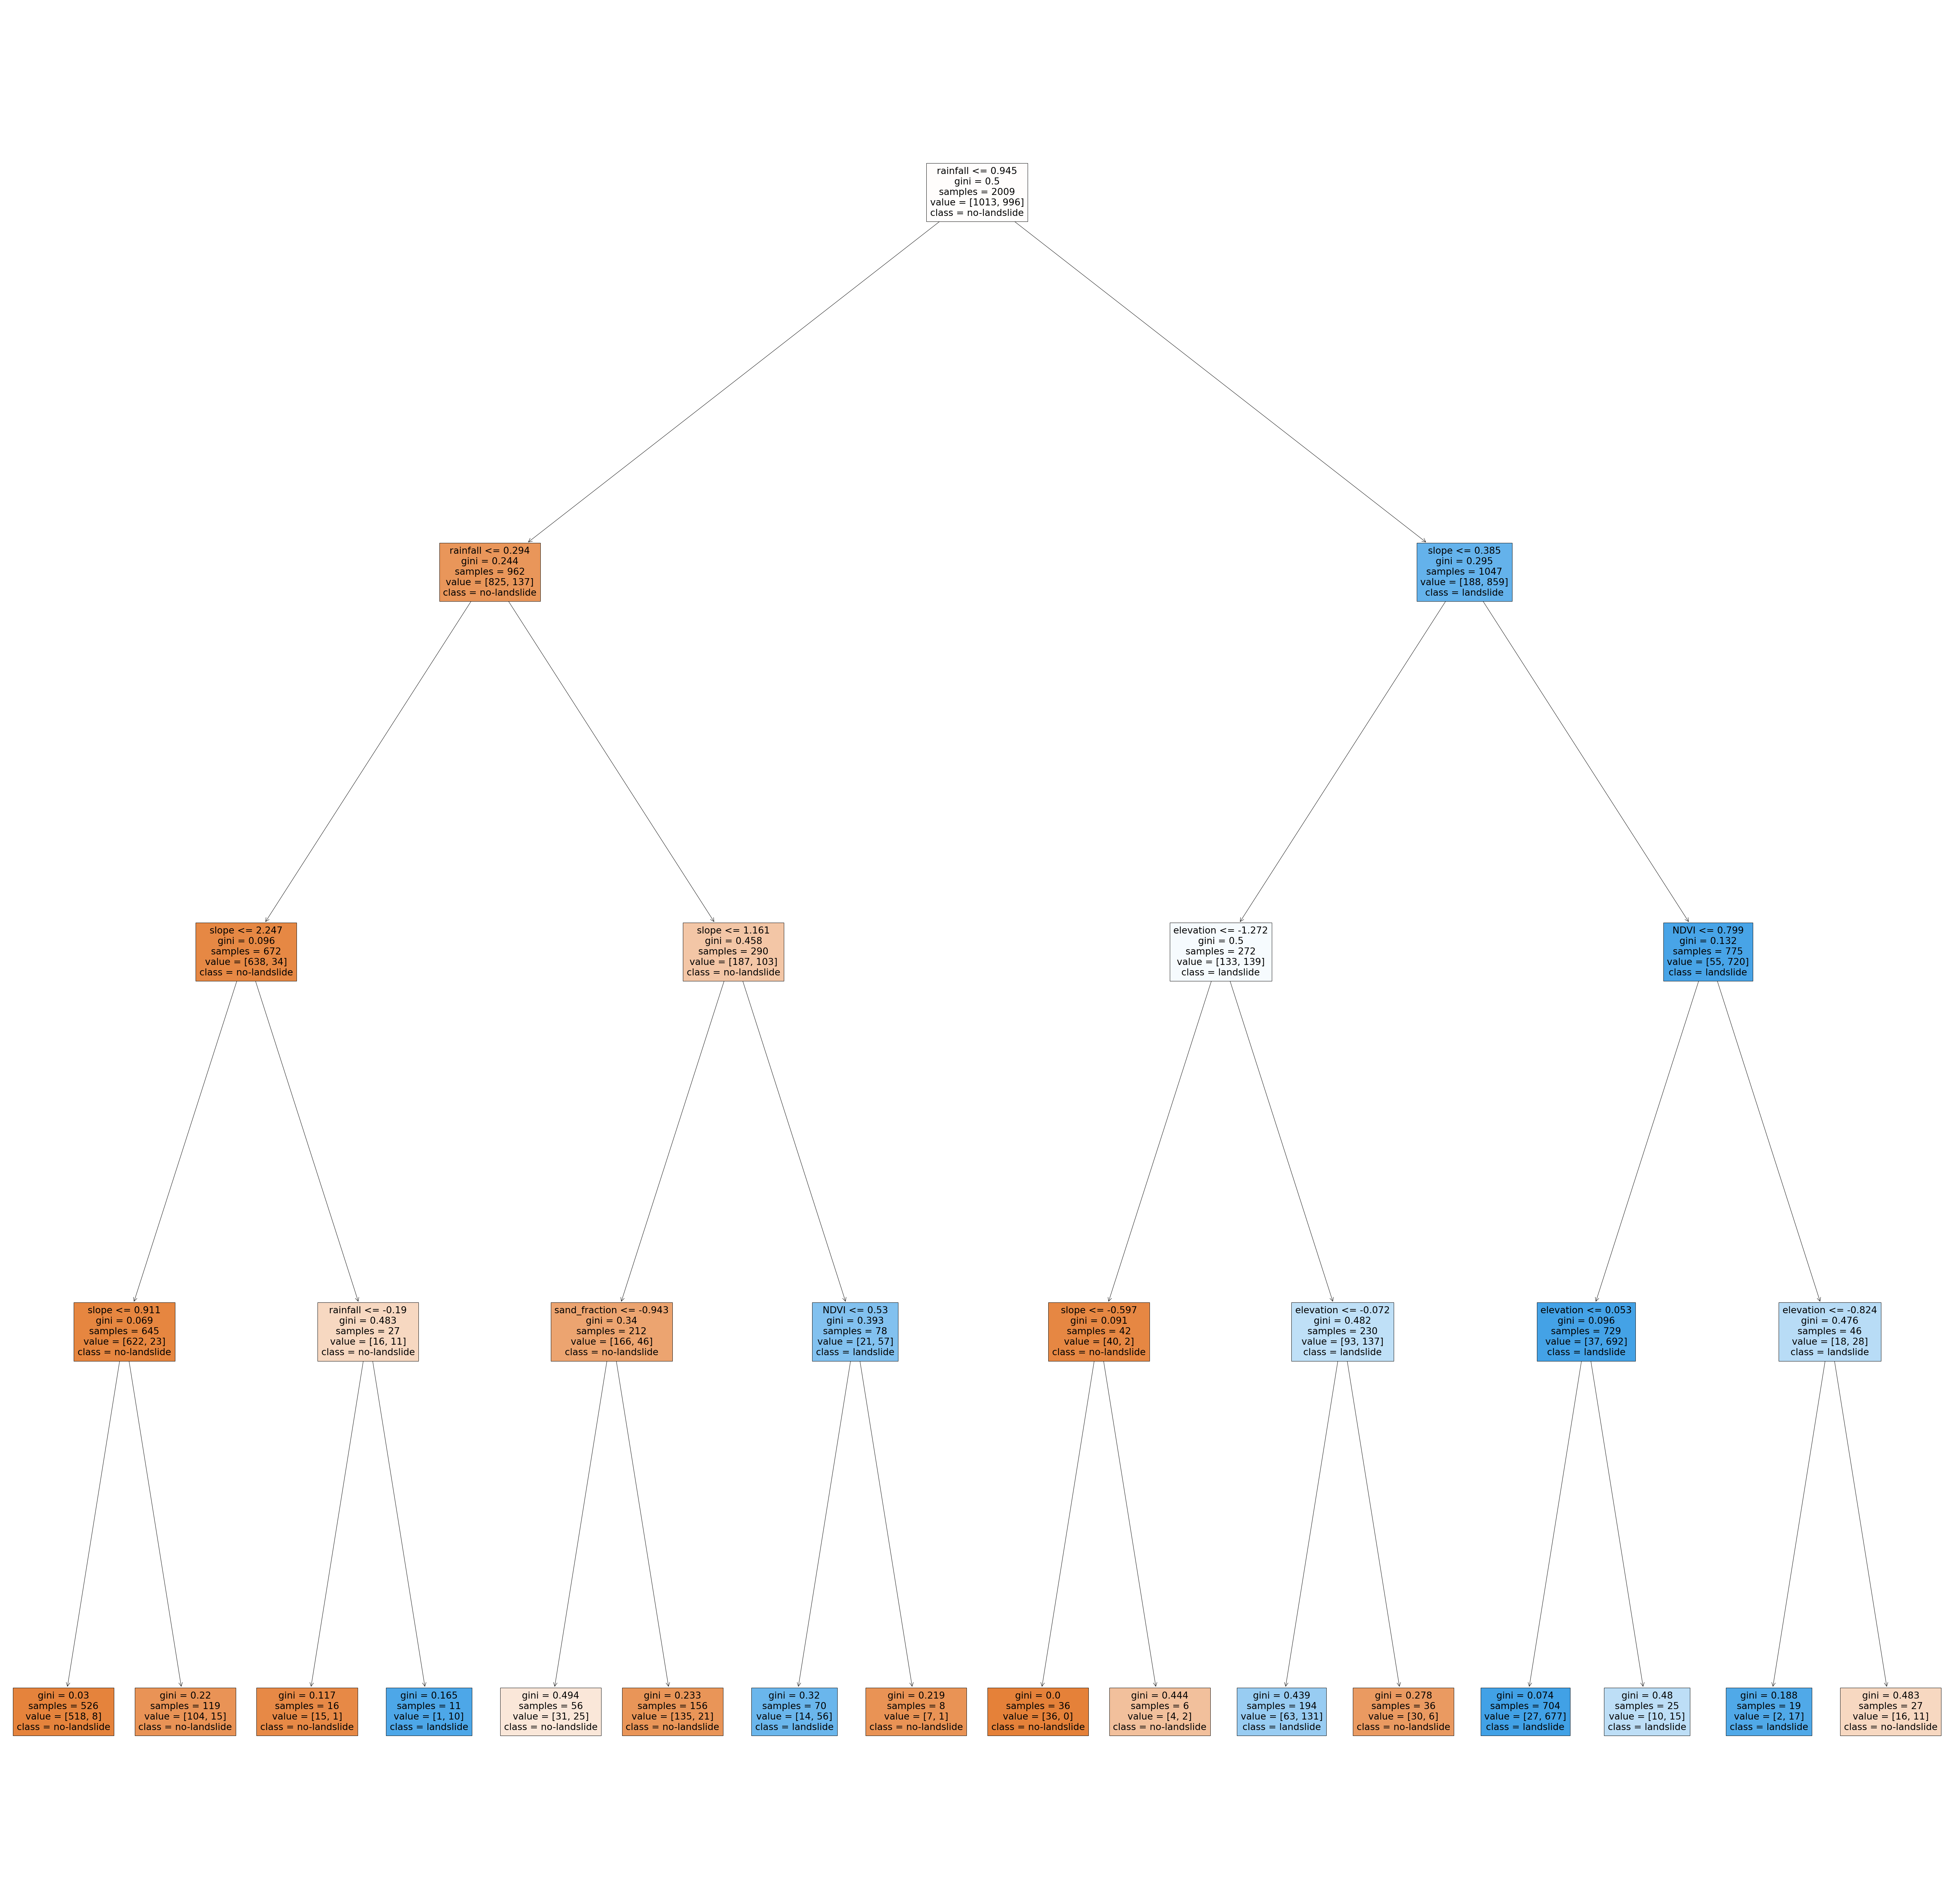

In [112]:
for i in range(0, 10):
    fig = plt.figure(figsize=(100,100))

    _ = tree.plot_tree(clf_depth_model[i], 
                       feature_names=["aspect", "clay_fraction", "elevation", "NDVI", "rainfall", "slope", "TWI", "sand_fraction"],  
                       class_names=["no-landslide","landslide"],
                       filled=True)
    fig.savefig("decistion_tree_" + str(i) + ".png")

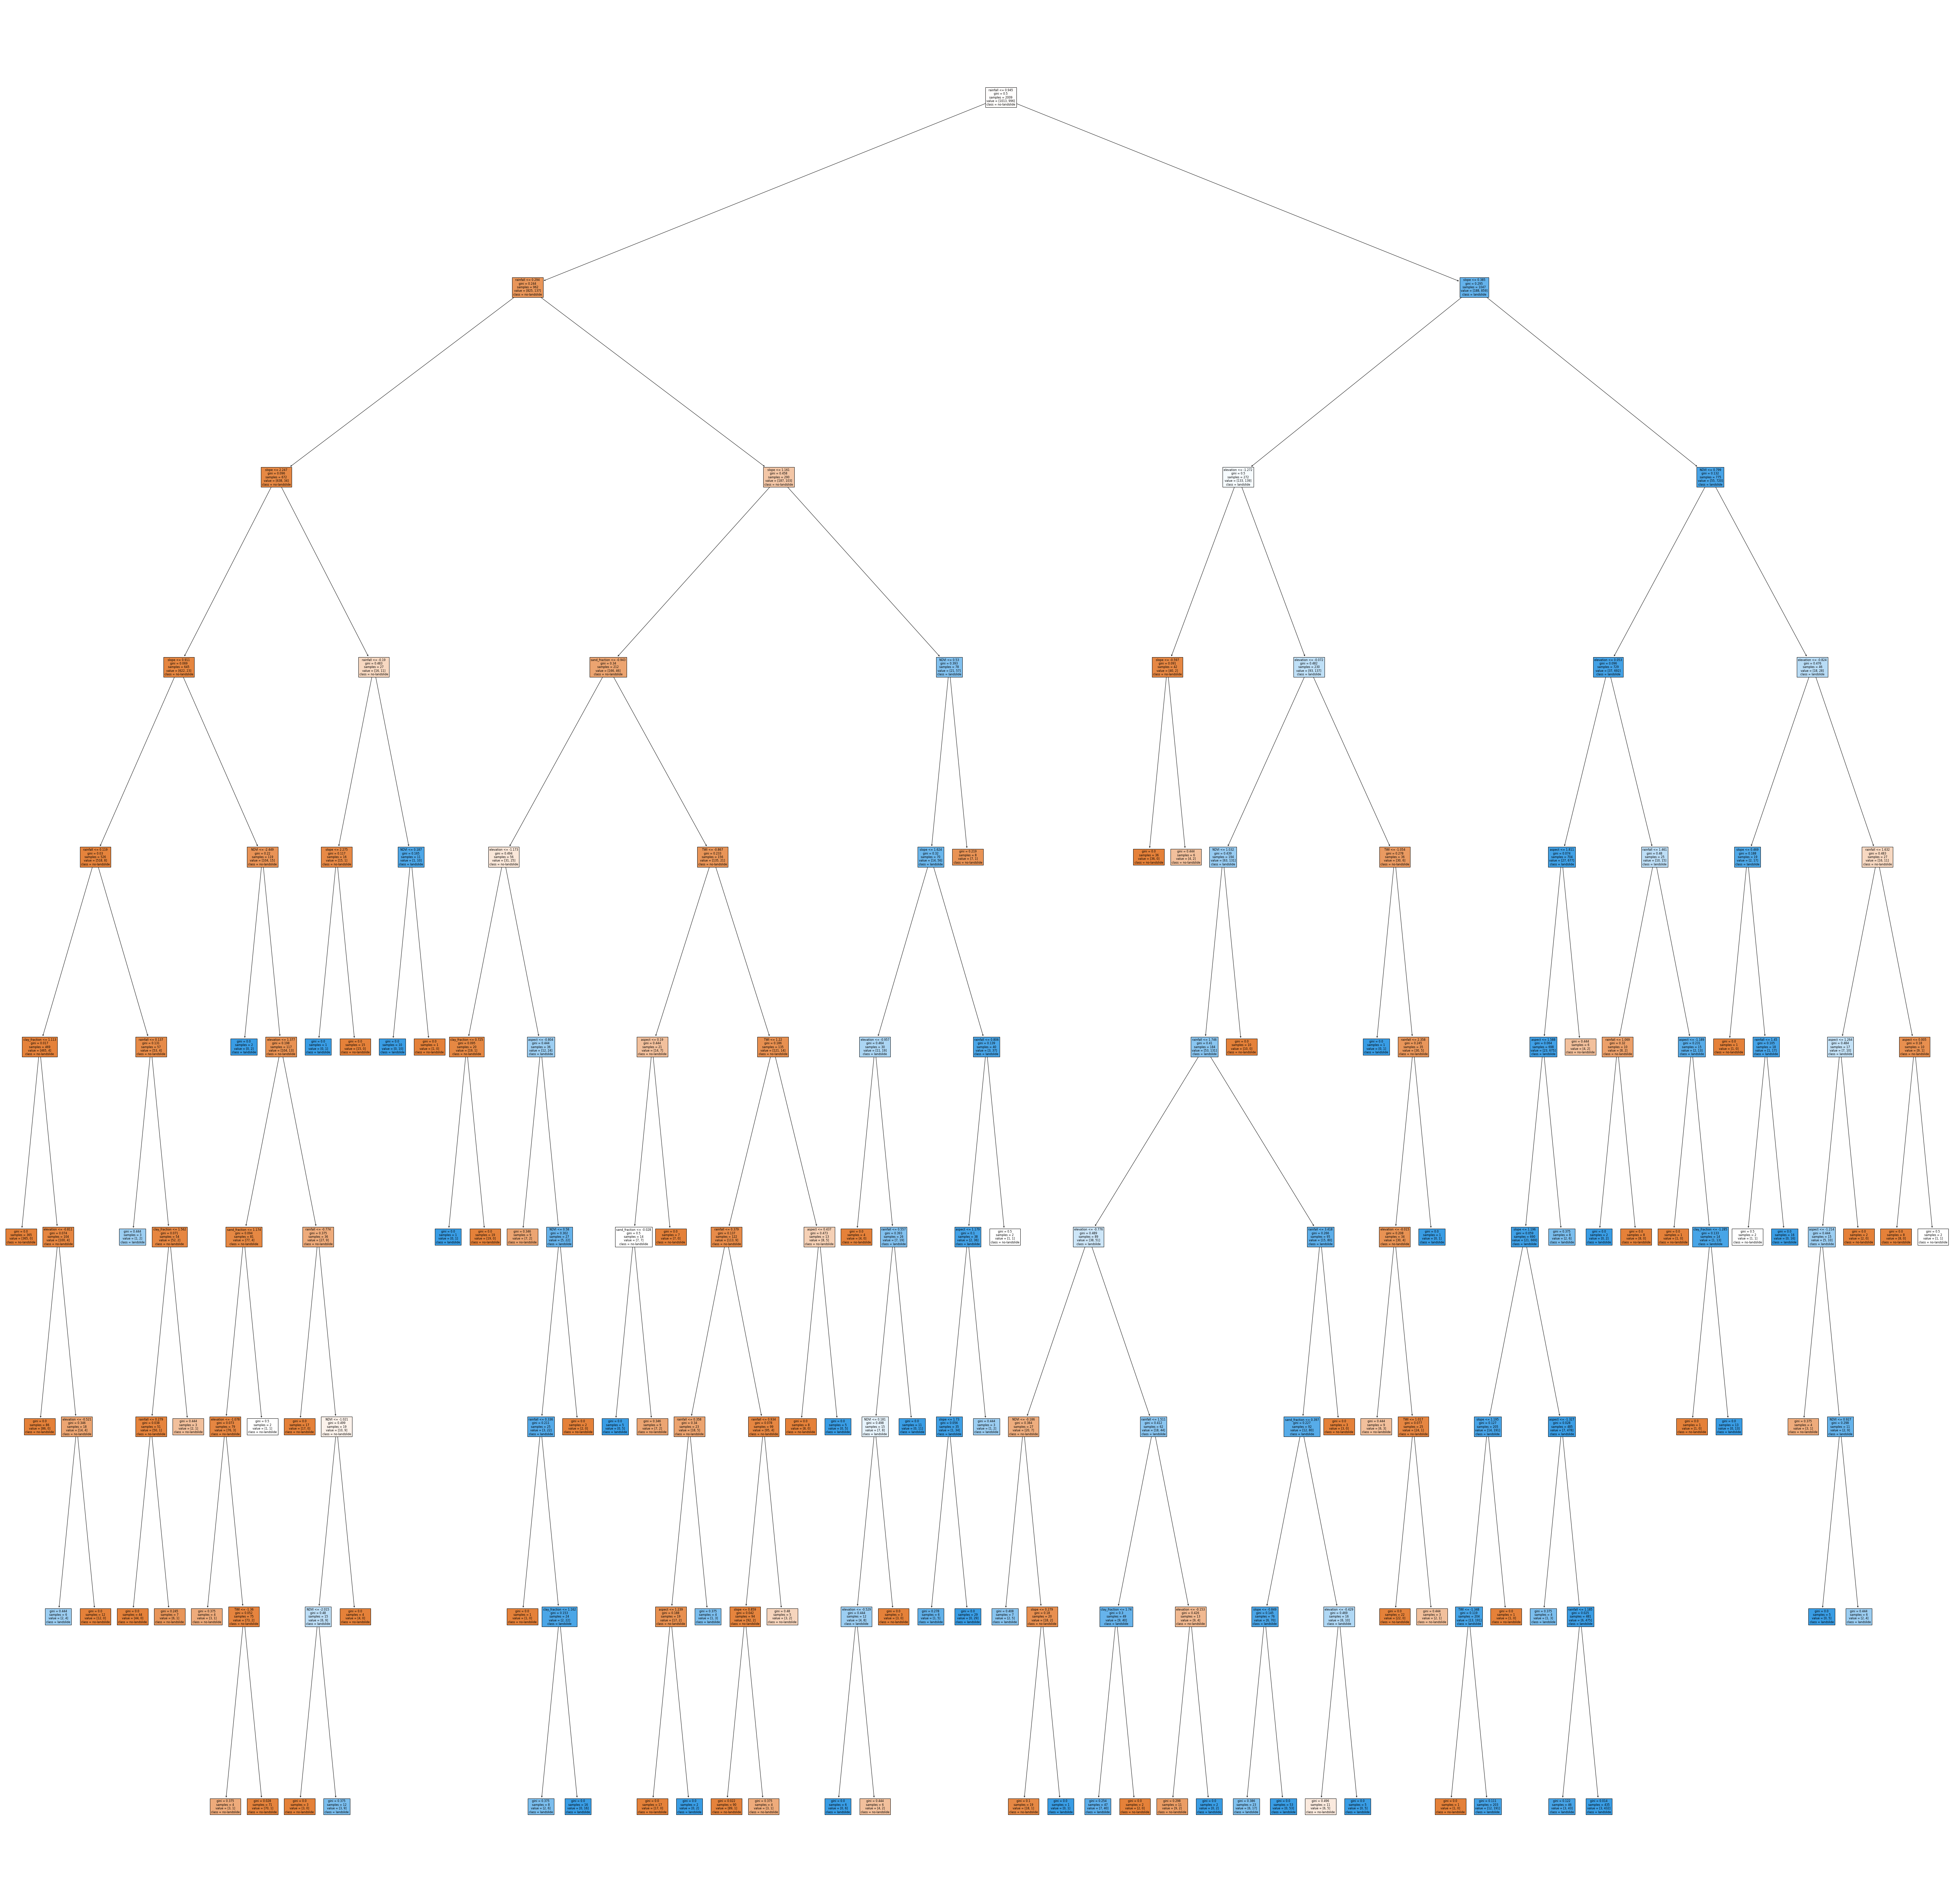

In [113]:
fig = plt.figure(figsize=(100,100))

_ = tree.plot_tree(clf_depth_model[8], 
                   feature_names=["aspect", "clay_fraction", "elevation", "NDVI", "rainfall", "slope", "TWI", "sand_fraction"],  
                   class_names=["no-landslide","landslide"],
                   filled=True)
fig.savefig("decistion_tree_" + str(8) + ".png")

# CLustering

In [114]:
Vector = List[float]

def num_differences(v1: Vector, v2: Vector) -> int:
    assert len(v1) == len(v2)
    return len([x1 for x1, x2 in zip(v1, v2) if x1 != x2])

def dot(v: Vector, w: Vector) -> float:
    """Computes v_1 * w_1 + ... + v_n * w_n"""
    assert len(v) == len(w), "vectors must be same length"

    return sum(v_i * w_i for v_i, w_i in zip(v, w))

def sum_of_squares(v: Vector) -> float:
    """Returns v_1 * v_1 + ... + v_n * v_n"""
    return dot(v, v)

def subtract(v: Vector, w: Vector) -> Vector:
    """Subtracts corresponding elements"""
    assert len(v) == len(w), "vectors must be the same length"

    return [v_i - w_i for v_i, w_i in zip(v, w)]

def vector_sum(vectors: List[Vector]) -> Vector:
    """Sums all corresponding elements"""
    # Check that vectors is not empty
    assert vectors, "no vectors provided!"

    # Check the vectors are all the same size
    num_elements = len(vectors[0])
    assert all(len(v) == num_elements for v in vectors), "different sizes!"

    # the i-th element of the result is the sum of every vector[i]
    return [sum(vector[i] for vector in vectors)
            for i in range(num_elements)]

def squared_distance(v: Vector, w: Vector) -> float:
    """Computes (v_1 - w_1) ** 2 + ... + (v_n - w_n) ** 2"""
    return sum_of_squares(subtract(v, w))

def distance(v: Vector, w: Vector) -> float:
    """Computes the distance between v and w"""
    return math.sqrt(squared_distance(v, w))

def scalar_multiply(c: float, v: Vector) -> Vector:
    """Multiplies every element by c"""
    return [c * v_i for v_i in v]

def vector_mean(vectors: List[Vector]) -> Vector:
    """Computes the element-wise average"""
    n = len(vectors)
    return scalar_multiply(1/n, vector_sum(vectors))

def cluster_means(k: int,
                  inputs: List[Vector],
                  assignments: List[int]) -> List[Vector]:
    # clusters[i] contains the inputs whose assignment is i
    clusters = [[] for i in range(k)]
    for input, assignment in zip(inputs, assignments):
        clusters[assignment].append(input)

    # if a cluster is empty, just use a random point
    return [vector_mean(cluster) if cluster else random.choice(inputs)
            for cluster in clusters]

class KMeans_:
    def __init__(self, k: int) -> None:
        self.k = k                      # number of clusters
        self.means = None

    def classify(self, input: Vector) -> int:
        """return the index of the cluster closest to the input"""
        return min(range(self.k),
                   key=lambda i: distance(input, self.means[i]))  #Euclidean distance

    def train(self, inputs: List[Vector]) -> None:
        # Start with random assignments
        assignments = [random.randrange(self.k) for _ in inputs]

        with tqdm.tqdm(itertools.count()) as t:
            for _ in t:
                # Compute means and find new assignments
                self.means = cluster_means(self.k, inputs, assignments)          
                new_assignments = [self.classify(input) for input in inputs]
                
               
                # Check how many assignments changed and if we're done
                num_changed = num_differences(assignments, new_assignments)
                if num_changed == 0:
                    return assignments

                # Otherwise keep the new assignments, and compute new means
                assignments = new_assignments
                self.means = cluster_means(self.k, inputs, assignments)
                t.set_description(f"changed: {num_changed} / {len(inputs)}")

changed: 7 / 2009: : 7it [00:00, 11.97it/s]  


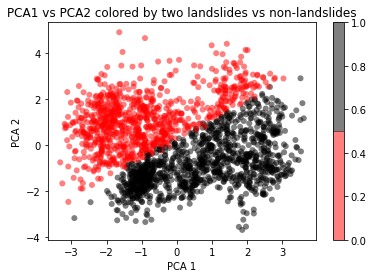

In [115]:
pca = PCA(n_components=8)
pca = pca.fit_transform(X_train)
pca.shape
clusterer = KMeans_(2)
clusterered = clusterer.train(X_train)
plt.scatter(pca[:, 0], pca[:, 1], c=clusterered, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('flag', 2))
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title("PCA1 vs PCA2 colored by two landslides vs non-landslides")
plt.colorbar();

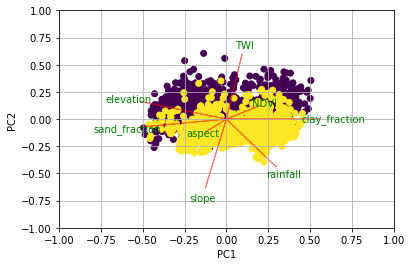

In [116]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.preprocessing import StandardScaler

y = by
#In general a good idea is to scale the data
scaler = StandardScaler()
scaler.fit(bX)
X=scaler.transform(bX)    

pca = PCA(n_components=8)
x_new = pca.fit_transform(X)

def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley, c = y)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
plt.grid()

#Call the function. Use only the 2 PCs.
myplot(x_new[:,0:2],np.transpose(pca.components_[0:2, :]), ["aspect", "clay_fraction", "elevation", "NDVI", "rainfall", "slope", "TWI", "sand_fraction"])
plt.show()

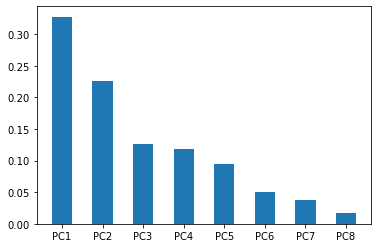

In [117]:
#Now, the importance of each feature is reflected by the magnitude of the 
#corresponding values in the eigenvectors (higher magnitude - higher importance)
pcaData = pca.explained_variance_ratio_
#PC1 explains 32% and PC2 22%. Together 55%
width = 0.5
labels = ["PC1", "PC2", "PC3", "PC4", "PC5", "PC6", "PC7", "PC8"]
plt.bar(labels, pcaData, width, align='center')

plt.xticks(labels, labels) #Replace default x-ticks with xs, then replace xs with labels

plt.show()


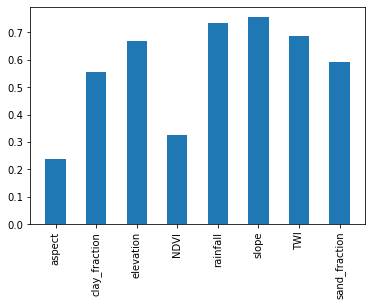

In [118]:
pcaData = (sum(abs( pca.components_[0:2,:])))
width = 0.5
labels = ["aspect", "clay_fraction", "elevation", "NDVI", "rainfall", "slope", "TWI", "sand_fraction"]
plt.bar(labels, pcaData, width, align='center')

plt.xticks(labels, labels, rotation='vertical') 
plt.savefig('pca2.png')
plt.show()

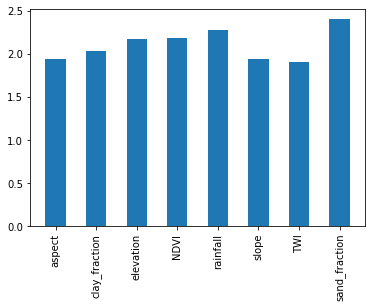

In [119]:
pcaData = (sum(abs( pca.components_)))
width = 0.5
labels = ["aspect", "clay_fraction", "elevation", "NDVI", "rainfall", "slope", "TWI", "sand_fraction"]
plt.bar(labels, pcaData, width, align='center')

plt.xticks(labels, labels, rotation='vertical') 
plt.savefig('pca2.png')
plt.show()

In [62]:
abs(pca.components_)

array([[0.1450686 , 0.56081096, 0.5200175 , 0.16420056, 0.30201224,
        0.08498387, 0.05116362, 0.5157662 ],
       [0.07948332, 0.03569035, 0.12775849, 0.12127885, 0.43866431,
        0.63647217, 0.59064686, 0.12243728],
       [0.56529884, 0.2157851 , 0.05130586, 0.66566897, 0.24921553,
        0.08013711, 0.01829772, 0.34534242],
       [0.77370285, 0.04229448, 0.02334823, 0.62510026, 0.01365721,
        0.04525353, 0.04758277, 0.0616529 ],
       [0.22589376, 0.25270646, 0.32773056, 0.2881945 , 0.56627997,
        0.13715254, 0.51179962, 0.30532833],
       [0.0555117 , 0.05952465, 0.14876884, 0.18398108, 0.0868691 ,
        0.73101627, 0.61707036, 0.12119075],
       [0.01050389, 0.12890204, 0.75260455, 0.00942491, 0.56978262,
        0.16126104, 0.02525212, 0.2558837 ],
       [0.0154516 , 0.74286321, 0.11886566, 0.08643007, 0.03458106,
        0.00321534, 0.05066845, 0.65003293]])

In [40]:
[x for x in pcaData]

[0.3208043479915528,
 0.22437924639977716,
 0.1284199693024182,
 0.11798369362229533,
 0.0979158584922791,
 0.052131174831437345,
 0.03927075681564648,
 0.019094952544593584]

In [120]:
print("Clustring accuracy (Train): ", (len(y_train) - sum(abs(clusterered-y_train))) / len(y_train))

Clustring accuracy (Train):  0.8173220507715281


# Logistic regression + PCA

In [123]:
pca = PCA(n_components=8)
pca_train = pca.fit_transform(X_train)
model = LogisticRegression(solver='liblinear').fit(pca_train[:,0:2], y_train)
pca = PCA(n_components=8)
pca_test = pca.fit_transform(X_test)
model.score(pca_test[:,0:2], y_test)

0.8767395626242545

changed: 2 / 2512: : 26it [00:02, 10.51it/s] 


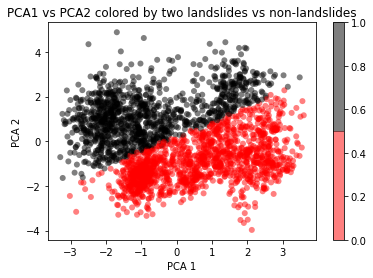

In [125]:
pca = PCA(n_components=8)
pca = pca.fit_transform(bX)
clusterer = KMeans_(2)
clusterered = clusterer.train(bX)
plt.scatter(pca[:, 0], pca[:, 1], c=clusterered, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('flag', 2))
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title("PCA1 vs PCA2 colored by two landslides vs non-landslides")
plt.colorbar();

changed: 3 / 2512: : 6it [00:00,  9.36it/s]  


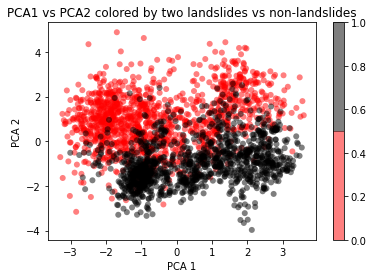

In [126]:
pca = PCA(n_components=8)
pca = pca.fit_transform(bX)
clusterer = KMeans_(2)
clusterered = clusterer.train(bX)
plt.scatter(pca[:, 0], pca[:, 1], c=by, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('flag', 2))
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title("PCA1 vs PCA2 colored by two landslides vs non-landslides")
plt.colorbar();

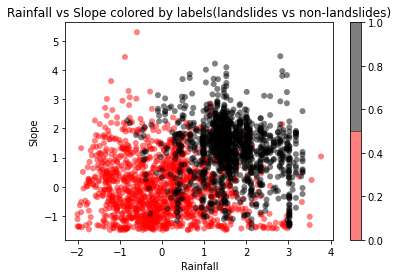

In [127]:
plt.scatter(bX[:, 4], bX[:, 5], c=by, edgecolor='none', facecolors = 'none', alpha=0.5,
            cmap=plt.cm.get_cmap('flag', 2))
plt.xlabel('Rainfall')
plt.ylabel('Slope')
plt.title("Rainfall vs Slope colored by labels(landslides vs non-landslides)")
plt.colorbar();

# Support Vector Machine

In [128]:
from sklearn import svm
from sklearn import metrics
#Create a svm Classifier
clf = svm.SVC(kernel='linear', tol=1e-4) # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8846918489065606


In [129]:
pca = PCA(n_components=8)
pca.fit(X_train)
X_t_train = pca.transform(X_train)
X_t_test = pca.transform(X_test)
clf = svm.SVC(kernel='linear', tol=1e-4) # Linear Kernel
clf.fit(X_t_train, y_train)
print( 'score', clf.score(X_t_test, y_test))


score 0.8846918489065606


# Neural network

In [76]:
import torch
class one_layer(torch.nn.Module):
    def __init__(self, inputSize: int, outputSize: int, act=None, dr=0) -> None:
        super(one_layer, self).__init__()
        self.outputSize = outputSize   
        self.w = Parameter(torch.randn(inputSize, outputSize))
        self.b = Parameter(torch.randn(outputSize))
        self.act = act
        self.dr = dr
        self.reset_parameters() 
    def forward(self, input):
        Y = torch.matmul(input,self.w)+self.b 
        if self.act is not None:
            Y = self.act(Y)
        return torch.dropout(Y,p=self.dr,train=self.training)
    def reset_parameters(self):
        std = 1.0 / math.sqrt(self.w.size(0))
        for para in self.parameters():
            para.data.uniform_(-std, std)

class two_layer(torch.nn.Module):
    def __init__(self, inputSize: int, hiddenSize: int, outputSize: int, act=None, dr=0.0) -> None:
        super(two_layer, self).__init__()
        self.hiddenSize = hiddenSize    # hidden size
        self.encoder = one_layer(inputSize, hiddenSize, act, dr)
        self.decoder = one_layer(hiddenSize, outputSize, act, dr)
        self.dr = dr
    def forward(self, x):
        h = self.encoder(x)
        yp = self.decoder(h)
        return yp, h

def trainModel(model,x,
               y,
               lossFun,
               nEpoch=500,
               miniBatch=100,
               saveEpoch=100,
               saveFolder=None,
               mode='seq2seq'):
    batchSize = miniBatch
    ngrid, nx = x.shape
    nIterEp = int(
        np.ceil(np.log(0.01) / np.log(1 - batchSize / ngrid)))
    train_set = TensorDataset(x, y)
    train_loader = DataLoader(dataset=train_set, batch_size=batchSize, shuffle=True)
    optim = torch.optim.Adadelta(model.parameters())
    model.zero_grad()
    for iEpoch in range(1, nEpoch + 1):
        lossEp = 0
        t0 = time.time()
        for istep, (xTrain, yTrain) in enumerate(train_loader):
            iGrid = np.random.randint(0, ngrid, [batchSize])
            yP2 = model(xTrain)
            if type(yP2) is tuple:
                (yP,h) = yP2
            else:
                yP = yP2

            loss = lossFun(yP, yTrain)
            loss.backward()
            optim.step()
            model.zero_grad()
            lossEp = lossEp + loss.item()
        # print loss
        lossEp = lossEp / (istep+1) # when using dataloader
        logStr = 'Epoch {} Loss {:.3f} time {:.2f}'.format(
            iEpoch, lossEp,
            time.time() - t0)
        print(logStr)        
    return model

# use standardized data

X_trainTorch = torch.tensor((X_train), dtype=torch.float) 
y_trainTorch = torch.tensor([list(y_train)], dtype=torch.float) 

X_testTorch = torch.tensor((X_test), dtype=torch.float) 
y_testTorch = torch.tensor([(y_test)], dtype=torch.float) 

y_trainTorch = y_trainTorch.reshape(536,1)
y_testTorch = y_testTorch.reshape(135,1)

autoencoder = two_layer(inputSize=16, hiddenSize=6, outputSize=1, dr=0.)
AE = trainModel(autoencoder, X_trainTorch, y_trainTorch, lossFun, nEpoch=50, miniBatch=50)
(yP_ae,h_ae) = autoencoder(xTest)
print(lossFuntion(yP_ae,yTest))


ModuleNotFoundError: No module named 'torch'